# ECS 171 Group 12 Heart Attack Prediction

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

#### Load Dataset

In [2]:
# Read in dataframe
df = pd.read_csv('./heart.csv')
df.tail()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


#### Local Outlier Factor Detection

In [3]:
from sklearn.neighbors import LocalOutlierFactor

LOF = LocalOutlierFactor(n_neighbors = 20, contamination = "auto")

lof_outliers = LOF.fit_predict(df)
print("Local Outlier Factor: " + str(lof_outliers[np.where(lof_outliers == -1)].shape[0]))

Local Outlier Factor: 10


In [4]:
outlier_list = np.where(lof_outliers == -1)[0].tolist()
df = df.drop(outlier_list)
len(df)

293

#### VIF Multicollinearity

In [5]:
df_drop = df.drop(["trtbps", "thalachh", "age","chol","thall"], axis=1)

#### Split Data 

In [6]:
normalize = MinMaxScaler()

X_drop = df_drop.drop("output", axis = 1)
y_drop = df_drop["output"]

X = df.drop("output", axis = 1)
y = df["output"]


In [7]:

X_train_drop, X_test_drop, y_train_drop, y_test_drop = train_test_split(X_drop, y_drop,test_size = 0.2, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.2, random_state=42)

#### Model Selection 

In [8]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, BaggingClassifier, AdaBoostClassifier, HistGradientBoostingClassifier, StackingClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier, PassiveAggressiveClassifier
from sklearn.metrics import recall_score,precision_score, f1_score
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from xgboost import XGBClassifier,XGBRFClassifier


def model_selection(X_train, y_train,X_test, y_test, estimator):
    """
    Test various estimators.
    """
    
    model = estimator

    # Instantiate the classification model and visualizer
    model.fit(X_train, y_train)  
    
    expected  = y_test
    predicted = model.predict(X_test)
    

    # Compute and return the F1 score (the harmonic mean of precision and recall)
    return [model.score(X_test,y_test), 
            recall_score(expected, predicted),
            precision_score(expected, predicted),
            f1_score(expected, predicted)]

def model_selection_normalize(X_train, y_train,X_test, y_test, estimator):
    """
    Test various estimators.
    """
    
    model = estimator

#     Instantiate the classification model and visualizer
    model.fit(normalize.fit_transform(X_train), y_train)  
    
    expected  = y_test
    predicted = model.predict(normalize.fit_transform(X_test))
    
    

    # Compute and return the F1 score (the harmonic mean of precision and recall)
    return [model.score(normalize.fit_transform(X_test),y_test), 
            recall_score(expected, predicted),
            precision_score(expected, predicted),
            f1_score(expected, predicted)
            ]


#### Considered Classifiers

In [9]:
estimator_lst = [
                 RandomForestClassifier(random_state = 42),
                 SVC(random_state = 42),
                 LogisticRegression(random_state = 42),
                 MLPClassifier(random_state = 42),
                 GaussianNB(),
                 KNeighborsClassifier(),
                 SGDClassifier(random_state = 42),
                 PassiveAggressiveClassifier(random_state = 42),
                 GradientBoostingClassifier(random_state = 42),
                 AdaBoostClassifier(random_state = 42),
                 HistGradientBoostingClassifier(random_state = 42),
                 GaussianProcessClassifier(random_state = 42),
                 BaggingClassifier(random_state = 42),
                 XGBClassifier(random_state = 42,use_label_encoder=False),
                 XGBRFClassifier(random_state = 42, use_label_encoder=False),
                

]

## DF with all columns not normalized

In [10]:
estimator = None
top_model = None
top_f1 = 0
print("df with dropped columns")
print("not normalized")
for estimator in estimator_lst:
    modelSelection = model_selection(X_train, y_train, X_test, y_test, estimator)
    print(estimator)
    print("-----------------------")
    print("Accuracy: " + str(modelSelection[0]) + "\n")
    print("Recall: " + str(modelSelection[1])+ "\n")
    print("Precision: " + str(modelSelection[2])+ "\n")
    print("F1 Score: " + str(modelSelection[3])+ "\n")
    if modelSelection[3] > top_f1:
        top_f1 = modelSelection[3]
        top_model = estimator
        
print("-----------------------")
print("Top Model: ", top_model)
print("Top F1 Score: ", top_f1)

df with dropped columns
not normalized
RandomForestClassifier(random_state=42)
-----------------------
Accuracy: 0.8305084745762712

Recall: 0.9117647058823529

Precision: 0.8157894736842105

F1 Score: 0.861111111111111

SVC(random_state=42)
-----------------------
Accuracy: 0.6610169491525424

Recall: 0.8529411764705882

Precision: 0.6590909090909091

F1 Score: 0.7435897435897436

LogisticRegression(random_state=42)
-----------------------
Accuracy: 0.8305084745762712

Recall: 0.9411764705882353

Precision: 0.8

F1 Score: 0.8648648648648648



/home/cam/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


MLPClassifier(random_state=42)
-----------------------
Accuracy: 0.7627118644067796

Recall: 0.8235294117647058

Precision: 0.7777777777777778

F1 Score: 0.7999999999999999

GaussianNB()
-----------------------
Accuracy: 0.8135593220338984

Recall: 0.9117647058823529

Precision: 0.7948717948717948

F1 Score: 0.8493150684931507

KNeighborsClassifier()
-----------------------
Accuracy: 0.6440677966101694

Recall: 0.6470588235294118

Precision: 0.7096774193548387

F1 Score: 0.6769230769230768

SGDClassifier(random_state=42)
-----------------------
Accuracy: 0.6949152542372882

Recall: 0.6470588235294118

Precision: 0.7857142857142857

F1 Score: 0.7096774193548386

PassiveAggressiveClassifier(random_state=42)
-----------------------
Accuracy: 0.4406779661016949

Recall: 0.029411764705882353

Precision: 1.0

F1 Score: 0.05714285714285715

GradientBoostingClassifier(random_state=42)
-----------------------
Accuracy: 0.7457627118644068

Recall: 0.8235294117647058

Precision: 0.756756756756756

## DF with all columns normalized

In [11]:
estimator = None
top_model = None
top_f1 = 0
print("df with dropped columns")
print("normalized")
for estimator in estimator_lst:
    modelSelection = model_selection_normalize(X_train, y_train, X_test, y_test, estimator)
    print(estimator)
    print("-----------------------")
    print("Accuracy: " + str(modelSelection[0]) + "\n")
    print("Recall: " + str(modelSelection[1])+ "\n")
    print("Precision: " + str(modelSelection[2])+ "\n")
    print("F1 Score: " + str(modelSelection[3])+ "\n")
    if modelSelection[3] > top_f1:
        top_f1 = modelSelection[3]
        top_model = estimator
        
print("-----------------------")
print("Top Model: ", top_model)
print("Top F1 Score: ", top_f1)

df with dropped columns
normalized
RandomForestClassifier(random_state=42)
-----------------------
Accuracy: 0.8305084745762712

Recall: 0.9117647058823529

Precision: 0.8157894736842105

F1 Score: 0.861111111111111

SVC(random_state=42)
-----------------------
Accuracy: 0.8305084745762712

Recall: 1.0

Precision: 0.7727272727272727

F1 Score: 0.8717948717948718

LogisticRegression(random_state=42)
-----------------------
Accuracy: 0.8305084745762712

Recall: 0.9705882352941176

Precision: 0.7857142857142857

F1 Score: 0.8684210526315789



/home/cam/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(random_state=42)
-----------------------
Accuracy: 0.8305084745762712

Recall: 0.9705882352941176

Precision: 0.7857142857142857

F1 Score: 0.8684210526315789

GaussianNB()
-----------------------
Accuracy: 0.7796610169491526

Recall: 0.8235294117647058

Precision: 0.8

F1 Score: 0.8115942028985507

KNeighborsClassifier()
-----------------------
Accuracy: 0.847457627118644

Recall: 0.9411764705882353

Precision: 0.8205128205128205

F1 Score: 0.8767123287671232

SGDClassifier(random_state=42)
-----------------------
Accuracy: 0.7457627118644068

Recall: 1.0

Precision: 0.6938775510204082

F1 Score: 0.819277108433735

PassiveAggressiveClassifier(random_state=42)
-----------------------
Accuracy: 0.7796610169491526

Recall: 0.9117647058823529

Precision: 0.7560975609756098

F1 Score: 0.8266666666666665

GradientBoostingClassifier(random_state=42)
-----------------------
Accuracy: 0.8135593220338984

Recall: 0.8529411764705882

Precision: 0.8285714285714286

F1 Score: 0.84057

## DF with columns removed not normalized

In [12]:
estimator = None
top_model = None
top_f1 = 0
print("df with dropped columns:")
print("not normalized:")
for estimator in estimator_lst:
    modelSelection = model_selection(X_train_drop, y_train_drop, X_test_drop, y_test_drop, estimator)
    print(estimator)
    print("-----------------------")
    print("Accuracy: " + str(modelSelection[0]) + "\n")
    print("Recall: " + str(modelSelection[1])+ "\n")
    print("Precision: " + str(modelSelection[2])+ "\n")
    print("F1 Score: " + str(modelSelection[3])+ "\n")
    if modelSelection[3] > top_f1:
        top_f1 = modelSelection[3]
        top_model = estimator
        
print("-----------------------")
print("Top Model: ", top_model)
print("Top F1 Score", top_f1)

df with dropped columns:
not normalized:
RandomForestClassifier(random_state=42)
-----------------------
Accuracy: 0.847457627118644

Recall: 0.9411764705882353

Precision: 0.8205128205128205

F1 Score: 0.8767123287671232

SVC(random_state=42)
-----------------------
Accuracy: 0.864406779661017

Recall: 1.0

Precision: 0.8095238095238095

F1 Score: 0.8947368421052632

LogisticRegression(random_state=42)
-----------------------
Accuracy: 0.8305084745762712

Recall: 0.9411764705882353

Precision: 0.8

F1 Score: 0.8648648648648648



/home/cam/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(random_state=42)
-----------------------
Accuracy: 0.847457627118644

Recall: 0.9705882352941176

Precision: 0.8048780487804879

F1 Score: 0.8800000000000001

GaussianNB()
-----------------------
Accuracy: 0.7796610169491526

Recall: 0.8529411764705882

Precision: 0.7837837837837838

F1 Score: 0.8169014084507041

KNeighborsClassifier()
-----------------------
Accuracy: 0.7966101694915254

Recall: 0.8529411764705882

Precision: 0.8055555555555556

F1 Score: 0.8285714285714286

SGDClassifier(random_state=42)
-----------------------
Accuracy: 0.8305084745762712

Recall: 1.0

Precision: 0.7727272727272727

F1 Score: 0.8717948717948718

PassiveAggressiveClassifier(random_state=42)
-----------------------
Accuracy: 0.7457627118644068

Recall: 0.9411764705882353

Precision: 0.7111111111111111

F1 Score: 0.8101265822784811

GradientBoostingClassifier(random_state=42)
-----------------------
Accuracy: 0.8305084745762712

Recall: 0.9411764705882353

Precision: 0.8

F1 Score: 0.8648

## DF with columns removed normalized

In [13]:
estimator = None
top_model = None
top_f1 = 0
print("df with dropped columns:")
print("normalized:")
for estimator in estimator_lst:
    modelSelection = model_selection_normalize(X_train_drop, y_train_drop, X_test_drop, y_test_drop, estimator)
    print(estimator)
    print("-----------------------")
    print("Accuracy: " + str(modelSelection[0]) + "\n")
    print("Recall: " + str(modelSelection[1])+ "\n")
    print("Precision: " + str(modelSelection[2])+ "\n")
    print("F1 Score: " + str(modelSelection[3])+ "\n")
    if modelSelection[3] > top_f1:
        top_f1 = modelSelection[3]
        top_model = estimator
        
print("-----------------------")
print("Top Model: ", top_model)
print("Top F1 Score", top_f1)

df with dropped columns:
normalized:
RandomForestClassifier(random_state=42)
-----------------------
Accuracy: 0.847457627118644

Recall: 0.9411764705882353

Precision: 0.8205128205128205

F1 Score: 0.8767123287671232

SVC(random_state=42)
-----------------------
Accuracy: 0.847457627118644

Recall: 0.9705882352941176

Precision: 0.8048780487804879

F1 Score: 0.8800000000000001

LogisticRegression(random_state=42)
-----------------------
Accuracy: 0.8305084745762712

Recall: 0.9411764705882353

Precision: 0.8

F1 Score: 0.8648648648648648



/home/cam/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(random_state=42)
-----------------------
Accuracy: 0.7966101694915254

Recall: 0.8823529411764706

Precision: 0.7894736842105263

F1 Score: 0.8333333333333333

GaussianNB()
-----------------------
Accuracy: 0.7627118644067796

Recall: 0.8235294117647058

Precision: 0.7777777777777778

F1 Score: 0.7999999999999999

KNeighborsClassifier()
-----------------------
Accuracy: 0.7966101694915254

Recall: 0.8823529411764706

Precision: 0.7894736842105263

F1 Score: 0.8333333333333333

SGDClassifier(random_state=42)
-----------------------
Accuracy: 0.7796610169491526

Recall: 0.8235294117647058

Precision: 0.8

F1 Score: 0.8115942028985507

PassiveAggressiveClassifier(random_state=42)
-----------------------
Accuracy: 0.7966101694915254

Recall: 0.9117647058823529

Precision: 0.775

F1 Score: 0.8378378378378379

GradientBoostingClassifier(random_state=42)
-----------------------
Accuracy: 0.8135593220338984

Recall: 0.8823529411764706

Precision: 0.8108108108108109

F1 Score: 0.8

#### Resampling Methods

In [14]:
from sklearn.utils import resample
# cross val 
X_resample_drop = pd.concat([X_train_drop, y_train_drop], axis=1)

# separate minority and majority classes
no_heart_attack_drop = X_resample_drop[X_resample_drop.output==0]
heart_attack_drop = X_resample_drop[X_resample_drop.output==1]

In [15]:
X_resample = pd.concat([X_train, y_train], axis=1)

# separate minority and majority classes
no_heart_attack= X_resample[X_resample.output==0]
heart_attack= X_resample[X_resample.output==1]

#### Upsampling Dropped Columns

In [16]:
# upsample minority
output_upsample_drop = resample(no_heart_attack_drop,
                          replace=True, # sample with replacement
                          n_samples=len(heart_attack_drop), # match number in majority class
                          random_state=42) # reproducible results

# combine majority and upsampled minority
upsample_drop = pd.concat([heart_attack_drop, output_upsample_drop])

X_train_drop_upsample = upsample_drop.drop("output", axis = 1)
y_train_drop_upsample = upsample_drop["output"]

#### Downsampling Dropped Columns

In [17]:
# upsample minority
output_downsample_drop = resample(heart_attack_drop,
                          replace=True, # sample with replacement
                          n_samples=len(no_heart_attack_drop), # match number in majority class
                          random_state=42) # reproducible results

# combine majority and upsampled minority
downsample_drop = pd.concat([output_downsample_drop, no_heart_attack_drop])

X_train_drop_downsample = downsample_drop.drop("output", axis = 1)
y_train_drop_downsample = downsample_drop["output"]

#### Upsampling With All Columns

In [18]:
# upsample minority
output_upsample = resample(no_heart_attack,
                          replace=True, # sample with replacement
                          n_samples=len(heart_attack), # match number in majority class
                          random_state=42) # reproducible results

# combine majority and upsampled minority
upsample = pd.concat([heart_attack, output_upsample])
X_train_upsample = upsample.drop("output", axis = 1)
y_train_upsample = upsample["output"]

#### Downsampling With All Columns

In [19]:
# downsample majority
output_downsample = resample(heart_attack,
                                replace = False, # sample without replacement
                                n_samples = len(no_heart_attack), # match minority n
                                random_state = 42) # reproducible results

# combine minority and downsampled majority
downsample = pd.concat([output_downsample, no_heart_attack])
X_train_downsample = downsample.drop("output", axis = 1)
y_train_downsample = downsample["output"]

#### SMOTE Resampling

In [20]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X_train_smote, y_train_smote = sm.fit_resample(X_resample.drop("output", axis = 1), X_resample["output"])
X_train_smote = X_train_smote[ ['age'] + [ col for col in X_train_smote.columns if col != 'age' ] ]

In [21]:
X_smote, sex_smote = sm.fit_resample(X_resample.drop("sex", axis = 1), X_resample["sex"])
X_smote["sex"] = sex_smote.values

X_train_smote_sex = X_smote.drop("output", axis = 1)
smote_cols_sex = X_train_smote_sex.columns.tolist()
smote_cols_sex = smote_cols_sex[-1:]  + smote_cols_sex[:-1]
X_train_smote_sex = X_train_smote_sex[smote_cols_sex]
X_train_smote_sex = X_train_smote_sex[ ['age'] + [ col for col in X_train_smote_sex.columns if col != 'age' ] ]
y_train_smote_sex = X_smote["output"]

In [22]:
X_smote_drop, sex_smote_drop = sm.fit_resample(X_resample_drop.drop("sex", axis = 1), X_resample_drop["sex"])
X_smote_drop["sex"] = sex_smote_drop.values
smote_drop = X_smote_drop

X_train_drop_smote = smote_drop.drop("output", axis = 1)
smote_drop_cols = X_train_drop_smote.columns.tolist()
smote_drop_cols = smote_drop_cols[-1:]  + smote_drop_cols[:-1]
X_train_drop_smote_sex = X_train_drop_smote[smote_drop_cols]
y_train_drop_smote_sex = smote_drop["output"]

In [23]:
X_train_drop_smote, y_train_drop_smote = sm.fit_resample(X_resample_drop.drop("output", axis = 1), X_resample_drop["output"])

## Dropped Columns Not Normalized Upsample

In [24]:
estimator = None
top_model = None
top_f1 = 0
print("df with dropped columns:")
print("not normalized:")
print("upsample")
for estimator in estimator_lst:
    modelSelection = model_selection(X_train_drop_upsample, y_train_drop_upsample, X_test_drop, y_test_drop, estimator)
    print(estimator)
    print("-----------------------")
    print("Accuracy: " + str(modelSelection[0]) + "\n")
    print("Recall: " + str(modelSelection[1])+ "\n")
    print("Precision: " + str(modelSelection[2])+ "\n")
    print("F1 Score: " + str(modelSelection[3])+ "\n")
    if modelSelection[3] > top_f1:
        top_f1 = modelSelection[3]
        top_model = estimator
        
print("-----------------------")
print("Top Model: ", top_model)
print("Top F1 Score", top_f1)

df with dropped columns:
not normalized:
upsample
RandomForestClassifier(random_state=42)
-----------------------
Accuracy: 0.847457627118644

Recall: 0.9411764705882353

Precision: 0.8205128205128205

F1 Score: 0.8767123287671232

SVC(random_state=42)
-----------------------
Accuracy: 0.864406779661017

Recall: 1.0

Precision: 0.8095238095238095

F1 Score: 0.8947368421052632

LogisticRegression(random_state=42)
-----------------------
Accuracy: 0.7966101694915254

Recall: 0.8823529411764706

Precision: 0.7894736842105263

F1 Score: 0.8333333333333333



/home/cam/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(random_state=42)
-----------------------
Accuracy: 0.8305084745762712

Recall: 0.9411764705882353

Precision: 0.8

F1 Score: 0.8648648648648648

GaussianNB()
-----------------------
Accuracy: 0.7796610169491526

Recall: 0.8529411764705882

Precision: 0.7837837837837838

F1 Score: 0.8169014084507041

KNeighborsClassifier()
-----------------------
Accuracy: 0.8135593220338984

Recall: 0.8823529411764706

Precision: 0.8108108108108109

F1 Score: 0.8450704225352113

SGDClassifier(random_state=42)
-----------------------
Accuracy: 0.6610169491525424

Recall: 0.5294117647058824

Precision: 0.8181818181818182

F1 Score: 0.6428571428571428

PassiveAggressiveClassifier(random_state=42)
-----------------------
Accuracy: 0.7966101694915254

Recall: 0.7941176470588235

Precision: 0.84375

F1 Score: 0.8181818181818182

GradientBoostingClassifier(random_state=42)
-----------------------
Accuracy: 0.8135593220338984

Recall: 0.9411764705882353

Precision: 0.7804878048780488

F1 Score: 0

## Dropped Columns Normalized Upsample

In [25]:
estimator = None
top_model = None
top_f1 = 0
print("df with dropped columns:")
print("normalized:")
print("upsample")
for estimator in estimator_lst:
    modelSelection = model_selection_normalize(X_train_drop_upsample, y_train_drop_upsample, X_test_drop, y_test_drop, estimator)
    print(estimator)
    print("-----------------------")
    print("Accuracy: " + str(modelSelection[0]) + "\n")
    print("Recall: " + str(modelSelection[1])+ "\n")
    print("Precision: " + str(modelSelection[2])+ "\n")
    print("F1 Score: " + str(modelSelection[3])+ "\n")
    if modelSelection[3] > top_f1:
        top_f1 = modelSelection[3]
        top_model = estimator
        
print("-----------------------")
print("Top Model: ", top_model)
print("Top F1 Score", top_f1)

df with dropped columns:
normalized:
upsample
RandomForestClassifier(random_state=42)
-----------------------
Accuracy: 0.8305084745762712

Recall: 0.9117647058823529

Precision: 0.8157894736842105

F1 Score: 0.861111111111111

SVC(random_state=42)
-----------------------
Accuracy: 0.8305084745762712

Recall: 0.9411764705882353

Precision: 0.8

F1 Score: 0.8648648648648648

LogisticRegression(random_state=42)
-----------------------
Accuracy: 0.8135593220338984

Recall: 0.9117647058823529

Precision: 0.7948717948717948

F1 Score: 0.8493150684931507



/home/cam/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(random_state=42)
-----------------------
Accuracy: 0.7966101694915254

Recall: 0.8823529411764706

Precision: 0.7894736842105263

F1 Score: 0.8333333333333333

GaussianNB()
-----------------------
Accuracy: 0.7796610169491526

Recall: 0.8529411764705882

Precision: 0.7837837837837838

F1 Score: 0.8169014084507041

KNeighborsClassifier()
-----------------------
Accuracy: 0.7796610169491526

Recall: 0.8823529411764706

Precision: 0.7692307692307693

F1 Score: 0.8219178082191781

SGDClassifier(random_state=42)
-----------------------
Accuracy: 0.7457627118644068

Recall: 0.7941176470588235

Precision: 0.7714285714285715

F1 Score: 0.782608695652174

PassiveAggressiveClassifier(random_state=42)
-----------------------
Accuracy: 0.7627118644067796

Recall: 0.7941176470588235

Precision: 0.7941176470588235

F1 Score: 0.7941176470588235

GradientBoostingClassifier(random_state=42)
-----------------------
Accuracy: 0.8135593220338984

Recall: 0.8823529411764706

Precision: 0.8108

## No Dropped Columns Not Normalized Upsample

In [26]:
estimator = None
top_model = None
top_f1 = 0
print("df without dropped columns:")
print("not normalized:")
print("upsample")
for estimator in estimator_lst:
    modelSelection = model_selection(X_train_upsample, y_train_upsample, X_test, y_test, estimator)
    print(estimator)
    print("-----------------------")
    print("Accuracy: " + str(modelSelection[0]) + "\n")
    print("Recall: " + str(modelSelection[1])+ "\n")
    print("Precision: " + str(modelSelection[2])+ "\n")
    print("F1 Score: " + str(modelSelection[3])+ "\n")
    if modelSelection[3] > top_f1:
        top_f1 = modelSelection[3]
        top_model = estimator
        
print("-----------------------")
print("Top Model: ", top_model)
print("Top F1 Score", top_f1)

df without dropped columns:
not normalized:
upsample
RandomForestClassifier(random_state=42)
-----------------------
Accuracy: 0.7796610169491526

Recall: 0.8529411764705882

Precision: 0.7837837837837838

F1 Score: 0.8169014084507041

SVC(random_state=42)
-----------------------
Accuracy: 0.6610169491525424

Recall: 0.7647058823529411

Precision: 0.6842105263157895

F1 Score: 0.7222222222222222

LogisticRegression(random_state=42)
-----------------------
Accuracy: 0.7966101694915254

Recall: 0.8823529411764706

Precision: 0.7894736842105263

F1 Score: 0.8333333333333333



/home/cam/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


MLPClassifier(random_state=42)
-----------------------
Accuracy: 0.7288135593220338

Recall: 0.7058823529411765

Precision: 0.8

F1 Score: 0.7500000000000001

GaussianNB()
-----------------------
Accuracy: 0.8135593220338984

Recall: 0.9117647058823529

Precision: 0.7948717948717948

F1 Score: 0.8493150684931507

KNeighborsClassifier()
-----------------------
Accuracy: 0.6271186440677966

Recall: 0.7058823529411765

Precision: 0.6666666666666666

F1 Score: 0.6857142857142857

SGDClassifier(random_state=42)
-----------------------
Accuracy: 0.7288135593220338

Recall: 0.8235294117647058

Precision: 0.7368421052631579

F1 Score: 0.7777777777777778

PassiveAggressiveClassifier(random_state=42)
-----------------------
Accuracy: 0.4915254237288136

Recall: 0.11764705882352941

Precision: 1.0

F1 Score: 0.21052631578947367

GradientBoostingClassifier(random_state=42)
-----------------------
Accuracy: 0.7288135593220338

Recall: 0.9117647058823529

Precision: 0.7045454545454546

F1 Score: 0.7

## No Dropped Columns Normalized Upsample

In [27]:
estimator = None
top_model = None
top_f1 = 0
print("df without dropped columns:")
print("normalized:")
print("upsample")
for estimator in estimator_lst:
    modelSelection = model_selection_normalize(X_train_upsample, y_train_upsample, X_test, y_test, estimator)
    print(estimator)
    print("-----------------------")
    print("Accuracy: " + str(modelSelection[0]) + "\n")
    print("Recall: " + str(modelSelection[1])+ "\n")
    print("Precision: " + str(modelSelection[2])+ "\n")
    print("F1 Score: " + str(modelSelection[3])+ "\n")
    if modelSelection[3] > top_f1:
        top_f1 = modelSelection[3]
        top_model = estimator
        
print("-----------------------")
print("Top Model: ", top_model)
print("Top F1 Score", top_f1)

df without dropped columns:
normalized:
upsample
RandomForestClassifier(random_state=42)
-----------------------
Accuracy: 0.7966101694915254

Recall: 0.8823529411764706

Precision: 0.7894736842105263

F1 Score: 0.8333333333333333

SVC(random_state=42)
-----------------------
Accuracy: 0.7627118644067796

Recall: 0.9411764705882353

Precision: 0.7272727272727273

F1 Score: 0.8205128205128205

LogisticRegression(random_state=42)
-----------------------
Accuracy: 0.8135593220338984

Recall: 0.9117647058823529

Precision: 0.7948717948717948

F1 Score: 0.8493150684931507



/home/cam/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(random_state=42)
-----------------------
Accuracy: 0.8305084745762712

Recall: 0.9411764705882353

Precision: 0.8

F1 Score: 0.8648648648648648

GaussianNB()
-----------------------
Accuracy: 0.7627118644067796

Recall: 0.8235294117647058

Precision: 0.7777777777777778

F1 Score: 0.7999999999999999

KNeighborsClassifier()
-----------------------
Accuracy: 0.7796610169491526

Recall: 0.8529411764705882

Precision: 0.7837837837837838

F1 Score: 0.8169014084507041

SGDClassifier(random_state=42)
-----------------------
Accuracy: 0.7796610169491526

Recall: 0.9705882352941176

Precision: 0.7333333333333333

F1 Score: 0.8354430379746834

PassiveAggressiveClassifier(random_state=42)
-----------------------
Accuracy: 0.7796610169491526

Recall: 0.8529411764705882

Precision: 0.7837837837837838

F1 Score: 0.8169014084507041

GradientBoostingClassifier(random_state=42)
-----------------------
Accuracy: 0.7457627118644068

Recall: 0.8529411764705882

Precision: 0.7435897435897436



## Dropped Columns Not Normalized Downsample

In [28]:
estimator = None
top_model = None
top_f1 = 0
print("df with dropped columns:")
print("not normalized:")
print("downsample")
for estimator in estimator_lst:
    modelSelection = model_selection(X_train_drop_downsample, y_train_drop_downsample, X_test_drop, y_test_drop, estimator)
    print(estimator)
    print("-----------------------")
    print("Accuracy: " + str(modelSelection[0]) + "\n")
    print("Recall: " + str(modelSelection[1])+ "\n")
    print("Precision: " + str(modelSelection[2])+ "\n")
    print("F1 Score: " + str(modelSelection[3])+ "\n")
    if modelSelection[3] > top_f1:
        top_f1 = modelSelection[3]
        top_model = estimator
        
print("-----------------------")
print("Top Model: ", top_model)
print("Top F1 Score", top_f1)

df with dropped columns:
not normalized:
downsample
RandomForestClassifier(random_state=42)
-----------------------
Accuracy: 0.8135593220338984

Recall: 0.8823529411764706

Precision: 0.8108108108108109

F1 Score: 0.8450704225352113

SVC(random_state=42)
-----------------------
Accuracy: 0.864406779661017

Recall: 1.0

Precision: 0.8095238095238095

F1 Score: 0.8947368421052632

LogisticRegression(random_state=42)
-----------------------
Accuracy: 0.7966101694915254

Recall: 0.8823529411764706

Precision: 0.7894736842105263

F1 Score: 0.8333333333333333



/home/cam/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(random_state=42)
-----------------------
Accuracy: 0.847457627118644

Recall: 0.9705882352941176

Precision: 0.8048780487804879

F1 Score: 0.8800000000000001

GaussianNB()
-----------------------
Accuracy: 0.7288135593220338

Recall: 0.7647058823529411

Precision: 0.7647058823529411

F1 Score: 0.7647058823529412

KNeighborsClassifier()
-----------------------
Accuracy: 0.8135593220338984

Recall: 0.8823529411764706

Precision: 0.8108108108108109

F1 Score: 0.8450704225352113

SGDClassifier(random_state=42)
-----------------------
Accuracy: 0.7457627118644068

Recall: 0.7058823529411765

Precision: 0.8275862068965517

F1 Score: 0.7619047619047619

PassiveAggressiveClassifier(random_state=42)
-----------------------
Accuracy: 0.7457627118644068

Recall: 0.7352941176470589

Precision: 0.8064516129032258

F1 Score: 0.7692307692307693

GradientBoostingClassifier(random_state=42)
-----------------------
Accuracy: 0.8135593220338984

Recall: 0.8823529411764706

Precision: 0.8108

## Dropped Columns Normalized Downsample

In [29]:
estimator = None
top_model = None
top_f1 = 0
print("df with dropped columns:")
print("normalized:")
print("downsample")
for estimator in estimator_lst:
    modelSelection = model_selection_normalize(X_train_drop_downsample, y_train_drop_downsample, X_test_drop, y_test_drop, estimator)
    print(estimator)
    print("-----------------------")
    print("Accuracy: " + str(modelSelection[0]) + "\n")
    print("Recall: " + str(modelSelection[1])+ "\n")
    print("Precision: " + str(modelSelection[2])+ "\n")
    print("F1 Score: " + str(modelSelection[3])+ "\n")
    if modelSelection[3] > top_f1:
        top_f1 = modelSelection[3]
        top_model = estimator
        
print("-----------------------")
print("Top Model: ", top_model)
print("Top F1 Score", top_f1)

df with dropped columns:
normalized:
downsample
RandomForestClassifier(random_state=42)
-----------------------
Accuracy: 0.7627118644067796

Recall: 0.8235294117647058

Precision: 0.7777777777777778

F1 Score: 0.7999999999999999

SVC(random_state=42)
-----------------------
Accuracy: 0.7966101694915254

Recall: 0.8823529411764706

Precision: 0.7894736842105263

F1 Score: 0.8333333333333333

LogisticRegression(random_state=42)
-----------------------
Accuracy: 0.7966101694915254

Recall: 0.8823529411764706

Precision: 0.7894736842105263

F1 Score: 0.8333333333333333



/home/cam/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(random_state=42)
-----------------------
Accuracy: 0.8135593220338984

Recall: 0.9117647058823529

Precision: 0.7948717948717948

F1 Score: 0.8493150684931507

GaussianNB()
-----------------------
Accuracy: 0.7288135593220338

Recall: 0.7647058823529411

Precision: 0.7647058823529411

F1 Score: 0.7647058823529412

KNeighborsClassifier()
-----------------------
Accuracy: 0.7288135593220338

Recall: 0.7647058823529411

Precision: 0.7647058823529411

F1 Score: 0.7647058823529412

SGDClassifier(random_state=42)
-----------------------
Accuracy: 0.7457627118644068

Recall: 0.7058823529411765

Precision: 0.8275862068965517

F1 Score: 0.7619047619047619

PassiveAggressiveClassifier(random_state=42)
-----------------------
Accuracy: 0.7796610169491526

Recall: 0.8529411764705882

Precision: 0.7837837837837838

F1 Score: 0.8169014084507041

GradientBoostingClassifier(random_state=42)
-----------------------
Accuracy: 0.7796610169491526

Recall: 0.8235294117647058

Precision: 0.8



## No Dropped Columns Not Normalized Downsample

In [30]:
estimator = None
top_model = None
top_f1 = 0
print("df without dropped columns:")
print("not normalized:")
print("downsample")
for estimator in estimator_lst:
    modelSelection = model_selection(X_train_downsample, y_train_downsample, X_test, y_test, estimator)
    print(estimator)
    print("-----------------------")
    print("Accuracy: " + str(modelSelection[0]) + "\n")
    print("Recall: " + str(modelSelection[1])+ "\n")
    print("Precision: " + str(modelSelection[2])+ "\n")
    print("F1 Score: " + str(modelSelection[3])+ "\n")
    if modelSelection[3] > top_f1:
        top_f1 = modelSelection[3]
        top_model = estimator
        
print("-----------------------")
print("Top Model: ", top_model)
print("Top F1 Score", top_f1)

df without dropped columns:
not normalized:
downsample
RandomForestClassifier(random_state=42)
-----------------------
Accuracy: 0.8305084745762712

Recall: 0.9117647058823529

Precision: 0.8157894736842105

F1 Score: 0.861111111111111

SVC(random_state=42)
-----------------------
Accuracy: 0.6440677966101694

Recall: 0.7352941176470589

Precision: 0.6756756756756757

F1 Score: 0.7042253521126761

LogisticRegression(random_state=42)
-----------------------
Accuracy: 0.8135593220338984

Recall: 0.9117647058823529

Precision: 0.7948717948717948

F1 Score: 0.8493150684931507



/home/cam/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


MLPClassifier(random_state=42)
-----------------------
Accuracy: 0.711864406779661

Recall: 0.5588235294117647

Precision: 0.9047619047619048

F1 Score: 0.6909090909090908

GaussianNB()
-----------------------
Accuracy: 0.7966101694915254

Recall: 0.8823529411764706

Precision: 0.7894736842105263

F1 Score: 0.8333333333333333

KNeighborsClassifier()
-----------------------
Accuracy: 0.6779661016949152

Recall: 0.6470588235294118

Precision: 0.7586206896551724

F1 Score: 0.6984126984126984

SGDClassifier(random_state=42)
-----------------------
Accuracy: 0.6949152542372882

Recall: 0.7352941176470589

Precision: 0.7352941176470589

F1 Score: 0.735294117647059

PassiveAggressiveClassifier(random_state=42)
-----------------------
Accuracy: 0.6271186440677966

Recall: 0.7941176470588235

Precision: 0.6428571428571429

F1 Score: 0.7105263157894737

GradientBoostingClassifier(random_state=42)
-----------------------
Accuracy: 0.7627118644067796

Recall: 0.8235294117647058

Precision: 0.77777

## No Dropped Columns Normalized Downsample

In [31]:
estimator = None
top_model = None
top_f1 = 0
print("df without dropped columns:")
print("normalized:")
print("downsample")
for estimator in estimator_lst:
    modelSelection = model_selection_normalize(X_train_downsample, y_train_downsample, X_test, y_test, estimator)
    print(estimator)
    print("-----------------------")
    print("Accuracy: " + str(modelSelection[0]) + "\n")
    print("Recall: " + str(modelSelection[1])+ "\n")
    print("Precision: " + str(modelSelection[2])+ "\n")
    print("F1 Score: " + str(modelSelection[3])+ "\n")
    if modelSelection[3] > top_f1:
        top_f1 = modelSelection[3]
        top_model = estimator
        
print("-----------------------")
print("Top Model: ", top_model)
print("Top F1 Score", top_f1)

df without dropped columns:
normalized:
downsample
RandomForestClassifier(random_state=42)
-----------------------
Accuracy: 0.7966101694915254

Recall: 0.8235294117647058

Precision: 0.8235294117647058

F1 Score: 0.8235294117647058

SVC(random_state=42)
-----------------------
Accuracy: 0.7966101694915254

Recall: 0.8529411764705882

Precision: 0.8055555555555556

F1 Score: 0.8285714285714286

LogisticRegression(random_state=42)
-----------------------
Accuracy: 0.847457627118644

Recall: 0.9411764705882353

Precision: 0.8205128205128205

F1 Score: 0.8767123287671232



/home/cam/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(random_state=42)
-----------------------
Accuracy: 0.8135593220338984

Recall: 0.9117647058823529

Precision: 0.7948717948717948

F1 Score: 0.8493150684931507

GaussianNB()
-----------------------
Accuracy: 0.7627118644067796

Recall: 0.7941176470588235

Precision: 0.7941176470588235

F1 Score: 0.7941176470588235

KNeighborsClassifier()
-----------------------
Accuracy: 0.847457627118644

Recall: 0.9117647058823529

Precision: 0.8378378378378378

F1 Score: 0.8732394366197184

SGDClassifier(random_state=42)
-----------------------
Accuracy: 0.7966101694915254

Recall: 0.9117647058823529

Precision: 0.775

F1 Score: 0.8378378378378379

PassiveAggressiveClassifier(random_state=42)
-----------------------
Accuracy: 0.7457627118644068

Recall: 0.7352941176470589

Precision: 0.8064516129032258

F1 Score: 0.7692307692307693

GradientBoostingClassifier(random_state=42)
-----------------------
Accuracy: 0.7796610169491526

Recall: 0.7941176470588235

Precision: 0.8181818181818182


## Dropped Columns Not Normalized SMOTE Sex

In [32]:
estimator = None
top_model = None
top_f1 = 0
print("df with dropped columns:")
print("not normalized:")
print("SMOTE")
for estimator in estimator_lst:
    modelSelection = model_selection(X_train_drop_smote_sex, y_train_drop_smote_sex, X_test_drop, y_test_drop, estimator)
    print(estimator)
    print("-----------------------")
    print("Accuracy: " + str(modelSelection[0]) + "\n")
    print("Recall: " + str(modelSelection[1])+ "\n")
    print("Precision: " + str(modelSelection[2])+ "\n")
    print("F1 Score: " + str(modelSelection[3])+ "\n")
    if modelSelection[3] > top_f1:
        top_f1 = modelSelection[3]
        top_model = estimator
        
print("-----------------------")
print("Top Model: ", top_model)
print("Top F1 Score", top_f1)

df with dropped columns:
not normalized:
SMOTE
RandomForestClassifier(random_state=42)
-----------------------
Accuracy: 0.847457627118644

Recall: 0.9411764705882353

Precision: 0.8205128205128205

F1 Score: 0.8767123287671232

SVC(random_state=42)
-----------------------
Accuracy: 0.864406779661017

Recall: 1.0

Precision: 0.8095238095238095

F1 Score: 0.8947368421052632

LogisticRegression(random_state=42)
-----------------------
Accuracy: 0.8305084745762712

Recall: 0.9411764705882353

Precision: 0.8

F1 Score: 0.8648648648648648



/home/cam/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(random_state=42)
-----------------------
Accuracy: 0.847457627118644

Recall: 0.9705882352941176

Precision: 0.8048780487804879

F1 Score: 0.8800000000000001

GaussianNB()
-----------------------
Accuracy: 0.7966101694915254

Recall: 0.8823529411764706

Precision: 0.7894736842105263

F1 Score: 0.8333333333333333

KNeighborsClassifier()
-----------------------
Accuracy: 0.8135593220338984

Recall: 0.8823529411764706

Precision: 0.8108108108108109

F1 Score: 0.8450704225352113

SGDClassifier(random_state=42)
-----------------------
Accuracy: 0.711864406779661

Recall: 0.6764705882352942

Precision: 0.7931034482758621

F1 Score: 0.7301587301587301

PassiveAggressiveClassifier(random_state=42)
-----------------------
Accuracy: 0.711864406779661

Recall: 0.5882352941176471

Precision: 0.8695652173913043

F1 Score: 0.7017543859649124

GradientBoostingClassifier(random_state=42)
-----------------------
Accuracy: 0.8305084745762712

Recall: 0.9411764705882353

Precision: 0.8

F1 

## Dropped Columns Normalized SMOTE Sex

In [33]:
estimator = None
top_model = None
top_f1 = 0
print("df with dropped columns:")
print("normalized:")
print("SMOTE")
for estimator in estimator_lst:
    modelSelection = model_selection_normalize(X_train_drop_smote_sex, y_train_drop_smote_sex, X_test_drop, y_test_drop, estimator)
    print(estimator)
    print("-----------------------")
    print("Accuracy: " + str(modelSelection[0]) + "\n")
    print("Recall: " + str(modelSelection[1])+ "\n")
    print("Precision: " + str(modelSelection[2])+ "\n")
    print("F1 Score: " + str(modelSelection[3])+ "\n")
    if modelSelection[3] > top_f1:
        top_f1 = modelSelection[3]
        top_model = estimator
        
print("-----------------------")
print("Top Model: ", top_model)
print("Top F1 Score", top_f1)

df with dropped columns:
normalized:
SMOTE
RandomForestClassifier(random_state=42)
-----------------------
Accuracy: 0.8135593220338984

Recall: 0.8823529411764706

Precision: 0.8108108108108109

F1 Score: 0.8450704225352113

SVC(random_state=42)
-----------------------
Accuracy: 0.864406779661017

Recall: 1.0

Precision: 0.8095238095238095

F1 Score: 0.8947368421052632

LogisticRegression(random_state=42)
-----------------------
Accuracy: 0.8135593220338984

Recall: 0.9117647058823529

Precision: 0.7948717948717948

F1 Score: 0.8493150684931507



/home/cam/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(random_state=42)
-----------------------
Accuracy: 0.8305084745762712

Recall: 0.9411764705882353

Precision: 0.8

F1 Score: 0.8648648648648648

GaussianNB()
-----------------------
Accuracy: 0.7457627118644068

Recall: 0.7941176470588235

Precision: 0.7714285714285715

F1 Score: 0.782608695652174

KNeighborsClassifier()
-----------------------
Accuracy: 0.8305084745762712

Recall: 0.8823529411764706

Precision: 0.8333333333333334

F1 Score: 0.8571428571428571

SGDClassifier(random_state=42)
-----------------------
Accuracy: 0.7457627118644068

Recall: 0.7941176470588235

Precision: 0.7714285714285715

F1 Score: 0.782608695652174

PassiveAggressiveClassifier(random_state=42)
-----------------------
Accuracy: 0.6779661016949152

Recall: 0.5588235294117647

Precision: 0.8260869565217391

F1 Score: 0.6666666666666667

GradientBoostingClassifier(random_state=42)
-----------------------
Accuracy: 0.864406779661017

Recall: 0.9411764705882353

Precision: 0.8421052631578947

F1 

## No  Dropped Columns Not Normalized SMOTE Sex

In [34]:
estimator = None
top_model = None
top_f1 = 0
print("df without dropped columns:")
print("not normalized:")
print("SMOTE")
for estimator in estimator_lst:
    modelSelection = model_selection(X_train_smote_sex, y_train_smote_sex, X_test, y_test, estimator)
    print(estimator)
    print("-----------------------")
    print("Accuracy: " + str(modelSelection[0]) + "\n")
    print("Recall: " + str(modelSelection[1])+ "\n")
    print("Precision: " + str(modelSelection[2])+ "\n")
    print("F1 Score: " + str(modelSelection[3])+ "\n")
    if modelSelection[3] > top_f1:
        top_f1 = modelSelection[3]
        top_model = estimator
        
print("-----------------------")
print("Top Model: ", top_model)
print("Top F1 Score", top_f1)

df without dropped columns:
not normalized:
SMOTE
RandomForestClassifier(random_state=42)
-----------------------
Accuracy: 0.7627118644067796

Recall: 0.8235294117647058

Precision: 0.7777777777777778

F1 Score: 0.7999999999999999

SVC(random_state=42)
-----------------------
Accuracy: 0.6271186440677966

Recall: 0.8235294117647058

Precision: 0.6363636363636364

F1 Score: 0.717948717948718

LogisticRegression(random_state=42)
-----------------------
Accuracy: 0.7966101694915254

Recall: 0.8823529411764706

Precision: 0.7894736842105263

F1 Score: 0.8333333333333333



/home/cam/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


MLPClassifier(random_state=42)
-----------------------
Accuracy: 0.7627118644067796

Recall: 0.8529411764705882

Precision: 0.7631578947368421

F1 Score: 0.8055555555555555

GaussianNB()
-----------------------
Accuracy: 0.7457627118644068

Recall: 0.7941176470588235

Precision: 0.7714285714285715

F1 Score: 0.782608695652174

KNeighborsClassifier()
-----------------------
Accuracy: 0.7288135593220338

Recall: 0.7352941176470589

Precision: 0.78125

F1 Score: 0.7575757575757576

SGDClassifier(random_state=42)
-----------------------
Accuracy: 0.6101694915254238

Recall: 0.8823529411764706

Precision: 0.6122448979591837

F1 Score: 0.7228915662650602

PassiveAggressiveClassifier(random_state=42)
-----------------------
Accuracy: 0.4406779661016949

Recall: 0.029411764705882353

Precision: 1.0

F1 Score: 0.05714285714285715

GradientBoostingClassifier(random_state=42)
-----------------------
Accuracy: 0.847457627118644

Recall: 0.9411764705882353

Precision: 0.8205128205128205

F1 Score: 

## No Dropped Columns Normalized SMOTE Sex

In [35]:
estimator = None
top_model = None
top_f1 = 0
print("df without dropped columns:")
print("normalized:")
print("SMOTE")
for estimator in estimator_lst:
    modelSelection = model_selection_normalize(X_train_smote_sex, y_train_smote_sex, X_test, y_test, estimator)
    print(estimator)
    print("-----------------------")
    print("Accuracy: " + str(modelSelection[0]) + "\n")
    print("Recall: " + str(modelSelection[1])+ "\n")
    print("Precision: " + str(modelSelection[2])+ "\n")
    print("F1 Score: " + str(modelSelection[3])+ "\n")
    if modelSelection[3] > top_f1:
        top_f1 = modelSelection[3]
        top_model = estimator
        
print("-----------------------")
print("Top Model: ", top_model)
print("Top F1 Score", top_f1)

df without dropped columns:
normalized:
SMOTE
RandomForestClassifier(random_state=42)
-----------------------
Accuracy: 0.7288135593220338

Recall: 0.7647058823529411

Precision: 0.7647058823529411

F1 Score: 0.7647058823529412

SVC(random_state=42)
-----------------------
Accuracy: 0.7627118644067796

Recall: 0.9117647058823529

Precision: 0.7380952380952381

F1 Score: 0.8157894736842106

LogisticRegression(random_state=42)
-----------------------
Accuracy: 0.7796610169491526

Recall: 0.8529411764705882

Precision: 0.7837837837837838

F1 Score: 0.8169014084507041



/home/cam/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(random_state=42)
-----------------------
Accuracy: 0.7966101694915254

Recall: 0.8823529411764706

Precision: 0.7894736842105263

F1 Score: 0.8333333333333333

GaussianNB()
-----------------------
Accuracy: 0.6949152542372882

Recall: 0.6764705882352942

Precision: 0.7666666666666667

F1 Score: 0.71875

KNeighborsClassifier()
-----------------------
Accuracy: 0.7966101694915254

Recall: 0.8529411764705882

Precision: 0.8055555555555556

F1 Score: 0.8285714285714286

SGDClassifier(random_state=42)
-----------------------
Accuracy: 0.7966101694915254

Recall: 0.9411764705882353

Precision: 0.7619047619047619

F1 Score: 0.8421052631578947

PassiveAggressiveClassifier(random_state=42)
-----------------------
Accuracy: 0.6101694915254238

Recall: 0.3235294117647059

Precision: 1.0

F1 Score: 0.48888888888888893

GradientBoostingClassifier(random_state=42)
-----------------------
Accuracy: 0.8305084745762712

Recall: 0.8823529411764706

Precision: 0.8333333333333334

F1 Score: 

## Dropped Columns Not Normalized SMOTE

In [36]:
estimator = None
top_model = None
top_f1 = 0
print("df with dropped columns:")
print("not normalized:")
print("SMOTE")
for estimator in estimator_lst:
    modelSelection = model_selection(X_train_drop_smote, y_train_drop_smote, X_test_drop, y_test_drop, estimator)
    print(estimator)
    print("-----------------------")
    print("Accuracy: " + str(modelSelection[0]) + "\n")
    print("Recall: " + str(modelSelection[1])+ "\n")
    print("Precision: " + str(modelSelection[2])+ "\n")
    print("F1 Score: " + str(modelSelection[3])+ "\n")
    if modelSelection[3] > top_f1:
        top_f1 = modelSelection[3]
        top_model = estimator
        
print("-----------------------")
print("Top Model: ", top_model)
print("Top F1 Score", top_f1)

df with dropped columns:
not normalized:
SMOTE
RandomForestClassifier(random_state=42)
-----------------------
Accuracy: 0.8305084745762712

Recall: 0.9411764705882353

Precision: 0.8

F1 Score: 0.8648648648648648

SVC(random_state=42)
-----------------------
Accuracy: 0.847457627118644

Recall: 0.9705882352941176

Precision: 0.8048780487804879

F1 Score: 0.8800000000000001

LogisticRegression(random_state=42)
-----------------------
Accuracy: 0.8135593220338984

Recall: 0.9117647058823529

Precision: 0.7948717948717948

F1 Score: 0.8493150684931507



/home/cam/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(random_state=42)
-----------------------
Accuracy: 0.847457627118644

Recall: 0.9705882352941176

Precision: 0.8048780487804879

F1 Score: 0.8800000000000001

GaussianNB()
-----------------------
Accuracy: 0.7796610169491526

Recall: 0.8529411764705882

Precision: 0.7837837837837838

F1 Score: 0.8169014084507041

KNeighborsClassifier()
-----------------------
Accuracy: 0.8135593220338984

Recall: 0.8823529411764706

Precision: 0.8108108108108109

F1 Score: 0.8450704225352113

SGDClassifier(random_state=42)
-----------------------
Accuracy: 0.8135593220338984

Recall: 0.9117647058823529

Precision: 0.7948717948717948

F1 Score: 0.8493150684931507

PassiveAggressiveClassifier(random_state=42)
-----------------------
Accuracy: 0.711864406779661

Recall: 0.6176470588235294

Precision: 0.84

F1 Score: 0.711864406779661

GradientBoostingClassifier(random_state=42)
-----------------------
Accuracy: 0.847457627118644

Recall: 0.9705882352941176

Precision: 0.8048780487804879

F1 

## Dropped Columns Normalized SMOTE

In [37]:
estimator = None
top_model = None
top_f1 = 0
print("df with dropped columns:")
print("normalized:")
print("SMOTE")
for estimator in estimator_lst:
    modelSelection = model_selection_normalize(X_train_drop_smote, y_train_drop_smote, X_test_drop, y_test_drop, estimator)
    print(estimator)
    print("-----------------------")
    print("Accuracy: " + str(modelSelection[0]) + "\n")
    print("Recall: " + str(modelSelection[1])+ "\n")
    print("Precision: " + str(modelSelection[2])+ "\n")
    print("F1 Score: " + str(modelSelection[3])+ "\n")
    if modelSelection[3] > top_f1:
        top_f1 = modelSelection[3]
        top_model = estimator
        
print("-----------------------")
print("Top Model: ", top_model)
print("Top F1 Score", top_f1)

df with dropped columns:
normalized:
SMOTE
RandomForestClassifier(random_state=42)
-----------------------
Accuracy: 0.8305084745762712

Recall: 0.9117647058823529

Precision: 0.8157894736842105

F1 Score: 0.861111111111111

SVC(random_state=42)
-----------------------
Accuracy: 0.847457627118644

Recall: 0.9411764705882353

Precision: 0.8205128205128205

F1 Score: 0.8767123287671232

LogisticRegression(random_state=42)
-----------------------
Accuracy: 0.7796610169491526

Recall: 0.8529411764705882

Precision: 0.7837837837837838

F1 Score: 0.8169014084507041



/home/cam/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(random_state=42)
-----------------------
Accuracy: 0.847457627118644

Recall: 0.9705882352941176

Precision: 0.8048780487804879

F1 Score: 0.8800000000000001

GaussianNB()
-----------------------
Accuracy: 0.7627118644067796

Recall: 0.8235294117647058

Precision: 0.7777777777777778

F1 Score: 0.7999999999999999

KNeighborsClassifier()
-----------------------
Accuracy: 0.7796610169491526

Recall: 0.8529411764705882

Precision: 0.7837837837837838

F1 Score: 0.8169014084507041

SGDClassifier(random_state=42)
-----------------------
Accuracy: 0.7966101694915254

Recall: 0.7941176470588235

Precision: 0.84375

F1 Score: 0.8181818181818182

PassiveAggressiveClassifier(random_state=42)
-----------------------
Accuracy: 0.7627118644067796

Recall: 0.8235294117647058

Precision: 0.7777777777777778

F1 Score: 0.7999999999999999

GradientBoostingClassifier(random_state=42)
-----------------------
Accuracy: 0.847457627118644

Recall: 0.9117647058823529

Precision: 0.8378378378378378

## No Dropped Columns Not Normalized SMOTE

In [38]:
estimator = None
top_model = None
top_f1 = 0
print("df without dropped columns:")
print("not normalized:")
print("SMOTE")
for estimator in estimator_lst:
    modelSelection = model_selection(X_train_smote, y_train_smote, X_test, y_test, estimator)
    print(estimator)
    print("-----------------------")
    print("Accuracy: " + str(modelSelection[0]) + "\n")
    print("Recall: " + str(modelSelection[1])+ "\n")
    print("Precision: " + str(modelSelection[2])+ "\n")
    print("F1 Score: " + str(modelSelection[3])+ "\n")
    if modelSelection[3] > top_f1:
        top_f1 = modelSelection[3]
        top_model = estimator
        
print("-----------------------")
print("Top Model: ", top_model)
print("Top F1 Score", top_f1)

df without dropped columns:
not normalized:
SMOTE
RandomForestClassifier(random_state=42)
-----------------------
Accuracy: 0.8135593220338984

Recall: 0.9117647058823529

Precision: 0.7948717948717948

F1 Score: 0.8493150684931507

SVC(random_state=42)
-----------------------
Accuracy: 0.6610169491525424

Recall: 0.7352941176470589

Precision: 0.6944444444444444

F1 Score: 0.7142857142857144

LogisticRegression(random_state=42)
-----------------------
Accuracy: 0.7966101694915254

Recall: 0.8823529411764706

Precision: 0.7894736842105263

F1 Score: 0.8333333333333333



/home/cam/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


MLPClassifier(random_state=42)
-----------------------
Accuracy: 0.7796610169491526

Recall: 0.8529411764705882

Precision: 0.7837837837837838

F1 Score: 0.8169014084507041

GaussianNB()
-----------------------
Accuracy: 0.8305084745762712

Recall: 0.9411764705882353

Precision: 0.8

F1 Score: 0.8648648648648648

KNeighborsClassifier()
-----------------------
Accuracy: 0.6271186440677966

Recall: 0.5882352941176471

Precision: 0.7142857142857143

F1 Score: 0.6451612903225806

SGDClassifier(random_state=42)
-----------------------
Accuracy: 0.6440677966101694

Recall: 0.5

Precision: 0.8095238095238095

F1 Score: 0.6181818181818182

PassiveAggressiveClassifier(random_state=42)
-----------------------
Accuracy: 0.4745762711864407

Recall: 0.08823529411764706

Precision: 1.0

F1 Score: 0.1621621621621622

GradientBoostingClassifier(random_state=42)
-----------------------
Accuracy: 0.8135593220338984

Recall: 0.9117647058823529

Precision: 0.7948717948717948

F1 Score: 0.8493150684931507


## No Dropped Columns Normalized SMOTE

In [39]:
estimator = None
top_model = None
top_f1 = 0
print("df without dropped columns:")
print("normalized:")
print("SMOTE")
for estimator in estimator_lst:
    modelSelection = model_selection_normalize(X_train_smote, y_train_smote, X_test, y_test, estimator)
    print(estimator)
    print("-----------------------")
    print("Accuracy: " + str(modelSelection[0]) + "\n")
    print("Recall: " + str(modelSelection[1])+ "\n")
    print("Precision: " + str(modelSelection[2])+ "\n")
    print("F1 Score: " + str(modelSelection[3])+ "\n")
    if modelSelection[3] > top_f1:
        top_f1 = modelSelection[3]
        top_model = estimator
        
print("-----------------------")
print("Top Model: ", top_model)
print("Top F1 Score", top_f1)

df without dropped columns:
normalized:
SMOTE
RandomForestClassifier(random_state=42)
-----------------------
Accuracy: 0.7796610169491526

Recall: 0.8529411764705882

Precision: 0.7837837837837838

F1 Score: 0.8169014084507041

SVC(random_state=42)
-----------------------
Accuracy: 0.7966101694915254

Recall: 0.9411764705882353

Precision: 0.7619047619047619

F1 Score: 0.8421052631578947

LogisticRegression(random_state=42)
-----------------------
Accuracy: 0.8135593220338984

Recall: 0.9117647058823529

Precision: 0.7948717948717948

F1 Score: 0.8493150684931507



/home/cam/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(random_state=42)
-----------------------
Accuracy: 0.7796610169491526

Recall: 0.8823529411764706

Precision: 0.7692307692307693

F1 Score: 0.8219178082191781

GaussianNB()
-----------------------
Accuracy: 0.7627118644067796

Recall: 0.7941176470588235

Precision: 0.7941176470588235

F1 Score: 0.7941176470588235

KNeighborsClassifier()
-----------------------
Accuracy: 0.8305084745762712

Recall: 0.9117647058823529

Precision: 0.8157894736842105

F1 Score: 0.861111111111111

SGDClassifier(random_state=42)
-----------------------
Accuracy: 0.7457627118644068

Recall: 0.7647058823529411

Precision: 0.7878787878787878

F1 Score: 0.7761194029850745

PassiveAggressiveClassifier(random_state=42)
-----------------------
Accuracy: 0.7966101694915254

Recall: 1.0

Precision: 0.7391304347826086

F1 Score: 0.85

GradientBoostingClassifier(random_state=42)
-----------------------
Accuracy: 0.7966101694915254

Recall: 0.8529411764705882

Precision: 0.8055555555555556

F1 Score: 0.828

#### Hyperparameter Tuning

In [40]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

# Number of trees to be used
xgb_n_estimators = [int(x) for x in np.linspace(200, 2000, 10)]

# Maximum number of levels in tree
xgb_max_depth = [int(x) for x in np.linspace(2, 20, 10)]

# Minimum number of instaces needed in each node
xgb_min_child_weight = [int(x) for x in np.linspace(1, 10, 10)]

# Tree construction algorithm used in XGBoost
xgb_tree_method = ['auto', 'exact', 'approx', 'hist', 'gpu_hist']

# Learning rate
xgb_eta = [x for x in np.linspace(0.1, 0.6, 6)]

# Minimum loss reduction required to make further partition
xgb_gamma = [int(x) for x in np.linspace(0, 0.5, 6)]

# Learning objective used
xgb_objective = ['reg:squarederror', 'reg:squaredlogerror']

# Create the grid
xgb_grid = {'n_estimators': xgb_n_estimators,
            'max_depth': xgb_max_depth,
            'min_child_weight': xgb_min_child_weight,
            'tree_method': xgb_tree_method,
            'eta': xgb_eta,
            'gamma': xgb_gamma,
            'objective': xgb_objective}
# Define grid search
grid = RandomizedSearchCV(
  XGBRFClassifier(use_label_encoder= False),
  param_distributions=xgb_grid,
  scoring="f1",
  n_iter = 200,
  random_state = 42,
  verbose=0,
  n_jobs=-1,
)


#best_model = grid.fit(X_train_drop, y_train_drop)

In [41]:
#best_params = best_model.best_params_
#best_params

In [44]:
 from sklearn.model_selection import cross_val_score
    
#clf = XGBRFClassifier( use_label_encoder=False,tree_method = "approx", objective = "reg:squarederror",
#                      eta = 0.3, gamma=0,  max_depth = 4, n_estimators = 800,min_child_weight = 10, random_state = 42)

clf = XGBRFClassifier(random_state = 42)
#early stopping rounds = 5
clf.fit(X_train_drop, y_train_drop)

predictions = clf.predict(X_test_drop)
actual = y_test_drop

print("Test Set Metrics")
print("-----------------")
print("Accuracy: " + str(clf.score(X_test_drop, y_test_drop)))
print("Recall: " + str(recall_score(actual, predictions)))
print("Precision: " + str(precision_score(actual, predictions)))
print("F1 Score: " + str(f1_score(actual, predictions)))

/home/cam/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:51:18] WARNING: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Test Set Metrics
-----------------
Accuracy: 0.8813559322033898
Recall: 1.0
Precision: 0.8292682926829268
F1 Score: 0.9066666666666667


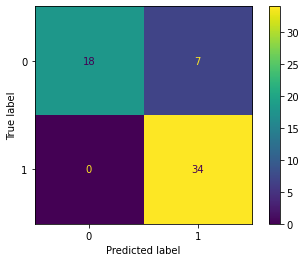

In [43]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(clf, X_test_drop, y_test_drop)  
plt.show() 